This notebook demonstrates how to calculate a projected quantum kernel. It applies the kernel to classify a two-moon dataset using an SVM algorithm. The kernel is defined using a quantum neural network (QNN) and a Chebyshev polynomial parameterized quantum circuit (PQC) feature map. The QNN includes Pauli Z, X, and Y expectation values as cost operators, which are used to estimate the kernel matrix elements. The kernel is evaluated for a given set of parameters and used to train an SVM classifier. Finally, the accuracy score and decision function of the classifier are plotted.

In [1]:
import numpy as np
from qiskit import Aer
from qiskit.circuit import ParameterVector
from qiskit.primitives import Estimator
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

from squlearn.kernel.matrix import ProjectedQuantumKernel
from squlearn.feature_map import ChebPQC,LayeredFeatureMap
from squlearn.util import Executor

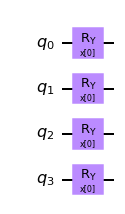

In [2]:
nqubits = 4
number_of_layers = 3
pqc = LayeredFeatureMap.from_string("Ry(x)",num_qubits=4,num_features=1)
pqc.draw()

In [3]:
kernel_matrix = ProjectedQuantumKernel(
    feature_map=pqc, measurement="XYZ", executor=Executor(Estimator()), gamma=0.5
)

In [4]:
kernel_matrix.get_params()

{'gamma': 0.5,
 'num_qubits': 4,
 'qubit': 3,
 'op_str': 'Z',
 'parameterized': False,
 'measurement': 'XYZ'}

In [5]:
kernel_matrix.evaluate(np.array([[0.1],[0.5]]), np.array([[0.1],[0.5]]))

array([[1.        , 0.72923734],
       [0.72923734, 1.        ]])

In [6]:
kernel_matrix.set_params(gamma=0.1)
kernel_matrix.evaluate(np.array([[0.1],[0.5]]), np.array([[0.1],[0.5]]))

array([[1.        , 0.93880151],
       [0.93880151, 1.        ]])

In [ ]:
kernel_matrix.set_params(measurement="X")
kernel_matrix.evaluate(np.array([[0.1],[0.5]]), np.array([[0.1],[0.5]]))

In [ ]:
kernel_matrix.set_params(measurement="Y")
kernel_matrix.evaluate(np.array([[0.1],[0.5]]), np.array([[0.1],[0.5]]))

In [ ]:
kernel_matrix.set_params(measurement="Z")
kernel_matrix.evaluate(np.array([[0.1],[0.5]]), np.array([[0.1],[0.5]]))